# **Lagrange Polynomial Calculator (Work In Progress)**

## **Contents**
- [Introduction](#Introduction)
- [The Lagrange Polynomial](#The-Lagrange-Polynomial)
- [Python Implementation](#Python-Implementation)
- [Credits](#Credits)


## **Introduction**
The purpose of this project is to calculate the Lagrange polynomial interpolating a set of points in the Cartesian plane. The `time`, `numpy`, `matplotlib` and `seaborn` libraries will be used. Moreover, the plot styles are changed for aesthetic reasons.

In [1]:
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("viridis_r", as_cmap=True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

## **The Lagrange Basis**
Let $n$ be a non-zero natural number in $\mathbb{N}$, let $\mathbf{\vec{x}}$ and $\mathbf{\vec{y}}$ be Euclidean vectors given by $\mathbf{\vec{x}} = \left(x_{k}\right)_{k = 1}^{n}$ and $\mathbf{\vec{y}} = \left(y_{k}\right)_{k = 1}^{n}$, for given $n$-tuples $\left(x_{k}\right)_{k = 1}^{n}$ and $\left(y_{k}\right)_{k = 1}^{n}$ in $\mathbb{R}^n$, such that:
$$\forall (j, k) \in [[1, n]]^2, \enspace j \neq k \implies x_{j} \neq x_{k}$$
That is, all components of the Euclidean vector $\mathbf{\vec{x}}$ are distinct.
- The *Lagrange basis for $\mathbf{\vec{x}}$ for polynomials of degree at most $n-1$* is the $n$-tuple of functions in $\mathscr{F}\left(\mathbb{R}, \mathbb{R}\right)^{n}$ denoted by $\left(\ell_{k, \mathbf{\vec{x}}}\right)_{k=1}^{n}$ and defined, for every natural number $k$ in $[[1,n]]$, by:
$$\begin{array}{c|ccc}
\ell_{k, \mathbf{\vec{x}}}\colon   &   \mathbb{R}  &   \longrightarrow &   \mathbb{R}  \\
                                    &   x           &   \longmapsto     &   \displaystyle\prod_{\substack{j = 1 \\ j \neq k}}^{n}\dfrac{x-x_{j}}{x_{k}-x_{j}}
\end{array}$$
- The *Lagrange polynomial for $\mathbf{\vec{x}}$ and $\mathbf{\vec{y}}$* is the function denoted by $\mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}$ and defined by:
$$\begin{array}{c|ccc}
\mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}\colon   &   \mathbb{R}  &   \longrightarrow &   \mathbb{R}  \\
                                    &   x           &   \longmapsto     &   \displaystyle\sum_{k=1}^{n}y_{k}\ell_{k}(x)
\end{array}$$
Several remarks are in order:
- The Lagrange polynomial $\mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}$ is uniquely determined by $\mathbf{\vec{x}}$ and $\mathbf{\vec{y}}$, provided that all of the components of the Euclidean vector $\mathbf{\vec{x}}$ are distinct.
- One has:
$$\forall k \in [[1,n]], \enspace \mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}\left(x_{k}\right) = y_{k}$$
- The components of the Euclidean vector $\mathbf{\vec{x}}$ are commonly called *nodes* and the components of the Euclidean vector $\mathbf{\vec{y}}$ are commonly called *values*.

## **Python Implementation**
The Python implementation for computing the Lagrange basis and the Lagrange polynomial is given in the code cell below.

In [25]:
def lagrange_basis_polynomial(nodes, k):
    """
    Computes a Lagrange basis polynomial for a set of nodes at the specified ordinal number (using 1-based indexing)

    Parameters
    ----------
    nodes : array-like
        Either a list or a numpy array object containing all of the nodes
    k : int
        An integer indicating the 1-based index of the polynomial of the Lagrange basis for the nodes to be computed
    
    Returns
    -------
    function
        A function equal to the Lagrange basis polynomial for the nodes at the specified 1-based index
    """
    assert k in range(1, len(nodes) + 1)
    X = np.array(nodes)
    x_k = X[k - 1]
    X = np.delete(X, k - 1)
    return lambda x: np.prod((x - X) / ((x_k - X)))

C:\Users\Zakar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Zakar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
         1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
         1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
         2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
         2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
         3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
         3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
         4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
         4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
         5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
         5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
         6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
         6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
         6.90909091,  7.        ,  7.09090909,  7.1

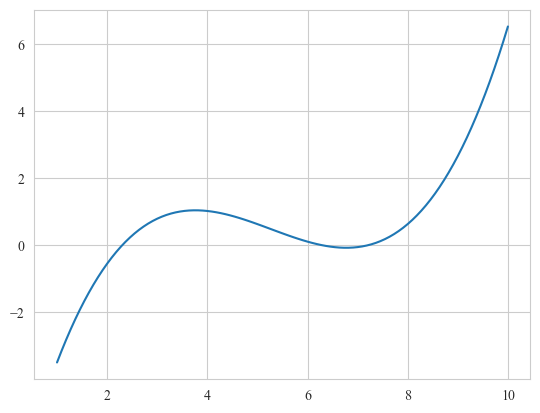

In [37]:
g = np.vectorize(lagrange_basis_polynomial([2.3,4.12,6.3,7.2], 2))
x = np.linspace(1, 10, 100)
y = g(x)
sns.lineplot(x = x, y = y)
x, y